In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
data_path = './optiver/data'
files = list(sorted([f for f in listdir(data_path)]))

In [4]:
df_daily = []
df_horizon = pd.DataFrame()

for idx, file in enumerate(files):
    df = pd.read_csv(join(data_path, file), parse_dates=['times'], index_col=['times'])
    #df = df.resample('1T').mean()
    df_daily.append(df)
    if idx < 1:
        df_horizon = df_horizon.append(df)

In [5]:
df_horizon

,price
times,
2017-03-15 09:00:00,3022.78
2017-03-15 09:00:01,3021.98
2017-03-15 09:00:02,3021.76
2017-03-15 09:00:03,3021.29
2017-03-15 09:00:04,3020.84
2017-03-15 09:00:05,3020.80
2017-03-15 09:00:06,3020.92
2017-03-15 09:00:07,3020.93
2017-03-15 09:00:08,3021.05


In [7]:
from statsmodels.tsa.arima_modefig, axes = plt.subplots(figsize=(25, 5))
for i in range(50):
    plt.axvline(x=i * 30600, color='k', lw=0.5)
df_50_days.price.plot(ax=axes, use_index=False)l import ARIMA

/home/jait/.virtualenvs/hackdelft/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
model = ARIMA(df_5_days.price, order=(10000, 1, 0))

In [ ]:
model_fit = model.fit(disp=0)

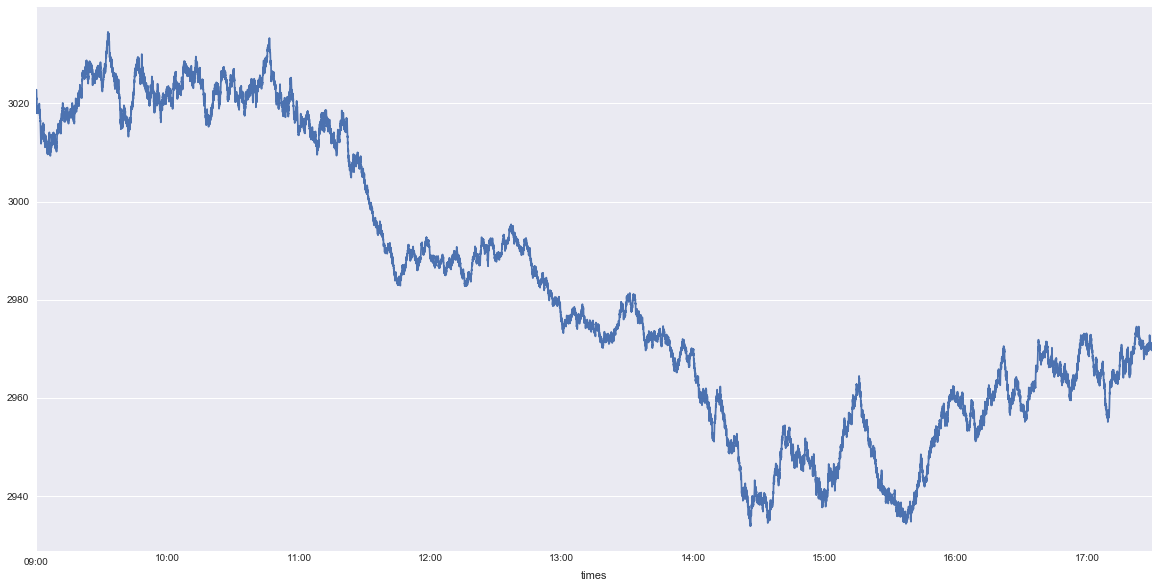

In [8]:
fig, axes = plt.subplots(figsize=(20, 10))
df_horizon.price.plot(ax=axes)

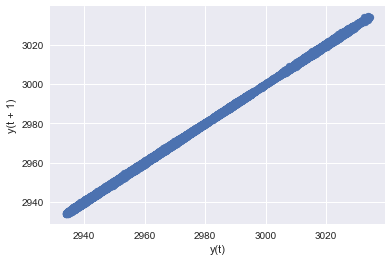

In [9]:
pd.plotting.lag_plot(df_horizon.price)

In [11]:
values = pd.DataFrame(df_horizon.price.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t-1', 't+1']
coeff = df.corr()
print(coeff)

          t-1       t+1
t-1  1.000000  0.999938
t+1  0.999938  1.000000


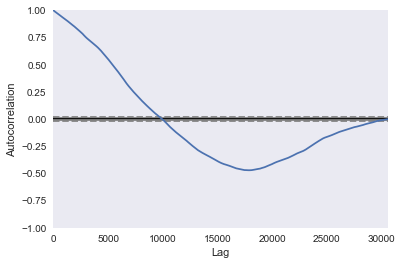

In [12]:
pd.plotting.autocorrelation_plot(df_horizon.price)

In [16]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_horizon.price, order=(5, 1, 0))

In [17]:
model_fit = model.fit(disp=0)

In [18]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                30599
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8082.377
Method:                       css-mle   S.D. of innovations              0.315
Date:                Sun, 14 May 2017   AIC                          16178.753
Time:                        07:58:26   BIC                          16237.054
Sample:                    03-15-2017   HQIC                         16197.442
                         - 03-15-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0017      0.002     -1.008      0.314      -0.005       0.002
ar.L1.D.price    -0.0329      0.006     -5.755      0.000      -0.044      -0.022
ar.L2.D.price    -0.0227      0.006     

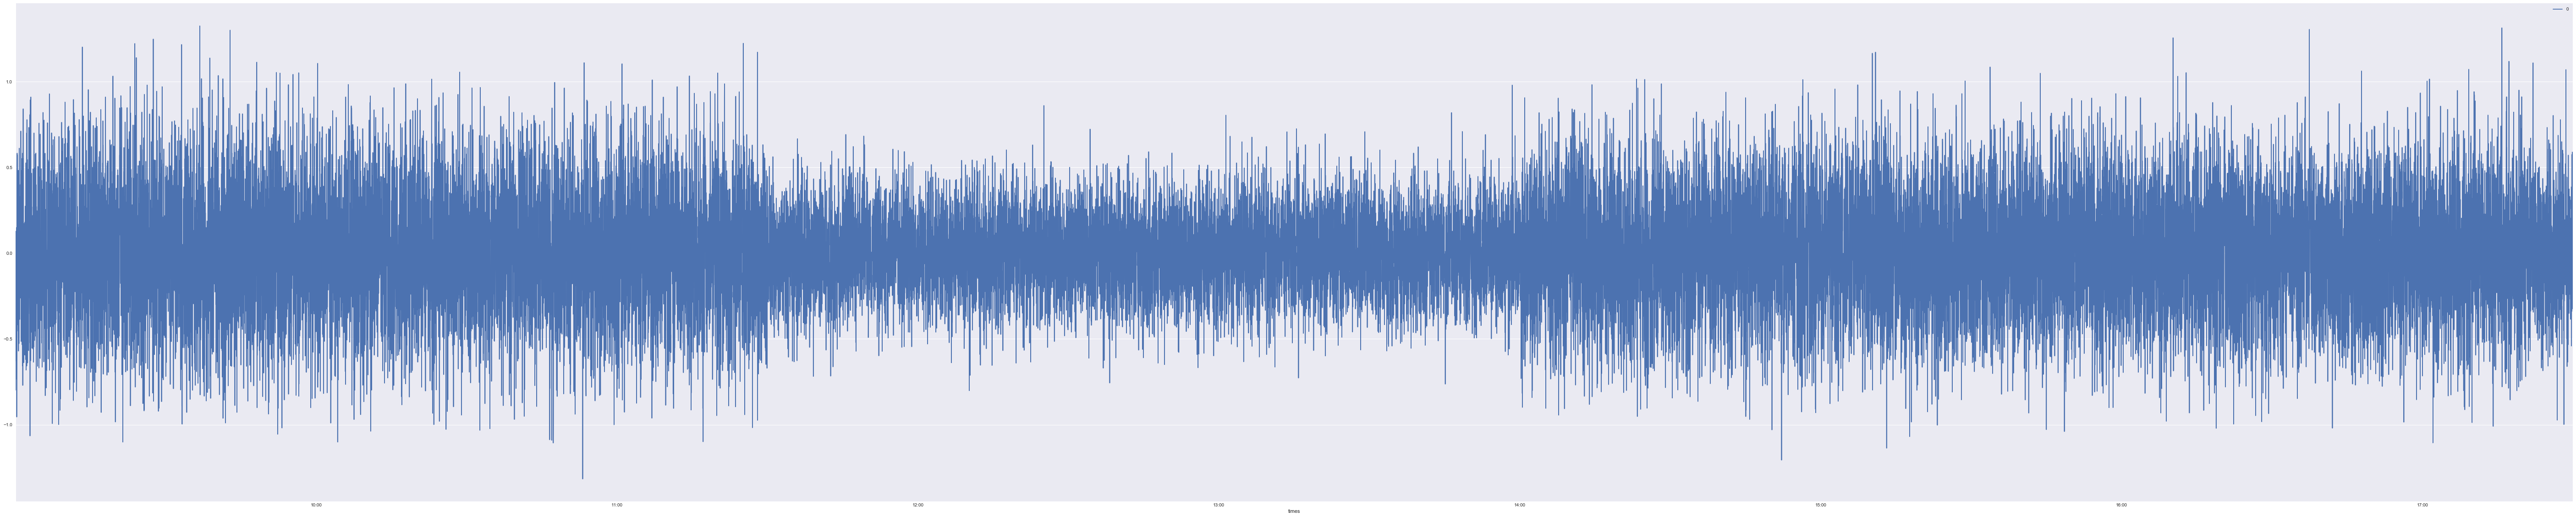

In [26]:
fig1, axes1 = plt.subplots(figsize=(100,20))
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(ax=axes1)

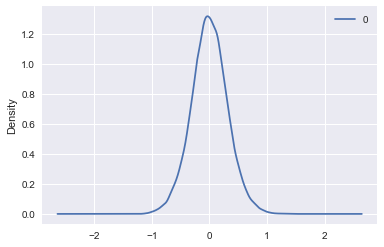

In [22]:
residuals.plot(kind='kde')

In [27]:
print(residuals.describe())

                  0
count  30599.000000
mean      -0.000002
std        0.315126
min       -1.316381
25%       -0.204693
50%       -0.001403
75%        0.202098
max        1.324929
